In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio, structural_similarity

(x_train, _), (x_test, _) = cifar10.load_data()
jpeg_psnr_scores = []
jpeg_ssim_scores = []

for i in range(len(x_test)):
    image = x_train[i]
    image_tensor = tf.convert_to_tensor(image, dtype=tf.float32)
    normalized_image = image_tensor / 255.0
    compressed_image = tf.image.encode_jpeg(tf.cast(normalized_image * 255, tf.uint8))
    decoded_image = tf.image.decode_jpeg(compressed_image, channels=3)
    psnr = peak_signal_noise_ratio(image, decoded_image.numpy().astype(np.uint8))
    jpeg_psnr_scores.append(psnr)
    ssim = structural_similarity(image, decoded_image.numpy().astype(np.uint8), multichannel=True)
    jpeg_ssim_scores.append(ssim)

avg_psnr = np.mean(jpeg_psnr_scores)
avg_ssim = np.mean(jpeg_ssim_scores)

print("Average PSNR: {:.2f}".format(avg_psnr))
print("Average SSIM: {:.2f}".format(avg_ssim))

<ipython-input-3-0f0b09090e03>:19: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim = structural_similarity(image, decoded_image.numpy().astype(np.uint8), multichannel=True)


Average PSNR: 34.66
Average SSIM: 0.98


NICE ARCHITECTURE

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import numpy as np
from skimage.metrics import peak_signal_noise_ratio, structural_similarity

(x_train, _), (x_test, _) = cifar10.load_data()
jpeg_psnr_scores = []
jpeg_ssim_scores = []

original_size = 0
compressed_size = 0

for i in range(len(x_test)):
    image = x_train[i]
    image_tensor = tf.convert_to_tensor(image, dtype=tf.float32)
    normalized_image = image_tensor / 255.0
    compressed_image = tf.image.encode_jpeg(tf.cast(normalized_image * 255, tf.uint8))
    decoded_image = tf.image.decode_jpeg(compressed_image, channels=3)
    psnr = peak_signal_noise_ratio(image, decoded_image.numpy().astype(np.uint8))
    jpeg_psnr_scores.append(psnr)
    ssim = structural_similarity(image, decoded_image.numpy().astype(np.uint8), multichannel=True)
    jpeg_ssim_scores.append(ssim)
    
    original_size += image.nbytes
    compressed_size += len(compressed_image.numpy())

avg_psnr = np.mean(jpeg_psnr_scores)
avg_ssim = np.mean(jpeg_ssim_scores)

compression_ratio = compressed_size/original_size 

print("Average PSNR: {:.2f}".format(avg_psnr))
print("Average SSIM: {:.2f}".format(avg_ssim))
print("Compression Ratio: {:.2f}".format(compression_ratio))


<ipython-input-2-50f28c506db5>:21: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim = structural_similarity(image, decoded_image.numpy().astype(np.uint8), multichannel=True)


Average PSNR: 34.66
Average SSIM: 0.98
Compression Ratio: 0.42


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, Reshape, Conv2DTranspose
from tensorflow.keras.models import Model
import numpy as np
from skimage.metrics import peak_signal_noise_ratio, structural_similarity

# Load and preprocess the CIFAR-10 dataset
(x_train, _), (x_test, _) = tf.keras.datasets.cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Define the NICE encoder architecture
def build_encoder():
    input_img = Input(shape=(32, 32, 3))
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', strides=2)(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = Flatten()(x)
    encoded = Dense(128)(x)

    encoder = Model(input_img, encoded, name='encoder')
    return encoder

# Define the NICE decoder architecture
def build_decoder():
    input_encoded = Input(shape=(128,))
    x = Dense(8*8*64)(input_encoded)
    x = Reshape((8, 8, 64))(x)
    x = Conv2DTranspose(64, (3, 3), activation='relu', padding='same')(x)
    x = Conv2DTranspose(64, (3, 3), activation='relu', padding='same')(x)
    x = Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(x)
    decoded = Conv2DTranspose(3, (3, 3), activation='sigmoid', padding='same')(x)

    decoder = Model(input_encoded, decoded, name='decoder')
    return decoder


# Combine the encoder and decoder into a single model
encoder = build_encoder()
decoder = build_decoder()
input_img = Input(shape=(32, 32, 3))
encoded = encoder(input_img)
decoded = decoder(encoded)
autoencoder = Model(input_img, decoded, name='autoencoder')

# Compile and train the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train, epochs=10, batch_size=128, shuffle=True, validation_data=(x_test, x_test))

# Compress and reconstruct images
compressed_images = encoder.predict(x_test)
reconstructed_images = decoder.predict(compressed_images)

# Calculate average PSNR and SSIM scores
psnr_scores = []
ssim_scores = []

for i in range(len(x_test)):
    psnr = peak_signal_noise_ratio(x_test[i], reconstructed_images[i])
    ssim = structural_similarity(x_test[i], reconstructed_images[i], multichannel=True)
    psnr_scores.append(psnr)
    ssim_scores.append(ssim)

average_psnr = np.mean(psnr_scores)
average_ssim = np.mean(ssim_scores)

print(f'Average PSNR: {average_psnr:.2f}')
print(f'Average SSIM: {average_ssim:.4f}')

Epoch 1/10


ValueError: ignored

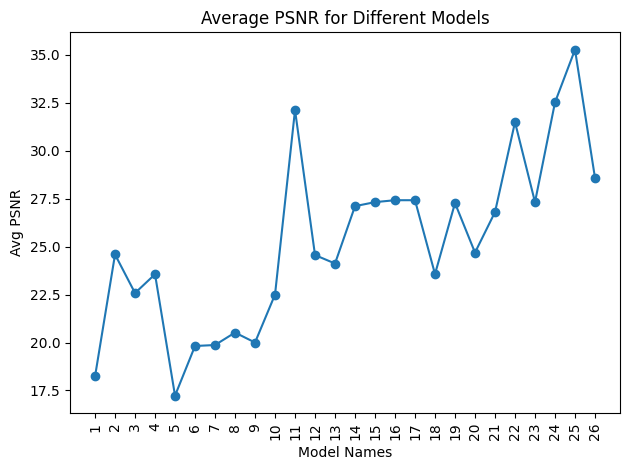

In [ ]:
import matplotlib.pyplot as plt

model_names = [
    "1", "2", "3", "4", "5", "6", "7", "8", "9", "10",
    "11", "12", "13", "14", "15", "16", "17", "18", "19", "20",
    "21", "22", "23", "24", "25", "26"
]

avg_psnr = [
    18.23, 24.59, 22.58, 23.56, 17.23, 19.82, 19.87, 20.52, 20, 22.5,
    32.12, 24.56, 24.12, 27.11, 27.32, 27.42, 27.42, 23.57, 27.27, 24.69,
    26.8, 31.49, 27.32, 32.52, 35.27, 28.58
]

plt.plot(model_names, avg_psnr, marker='o')
plt.xlabel("Model Names")
plt.ylabel("Avg PSNR")
plt.title("Average PSNR for Different Models")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


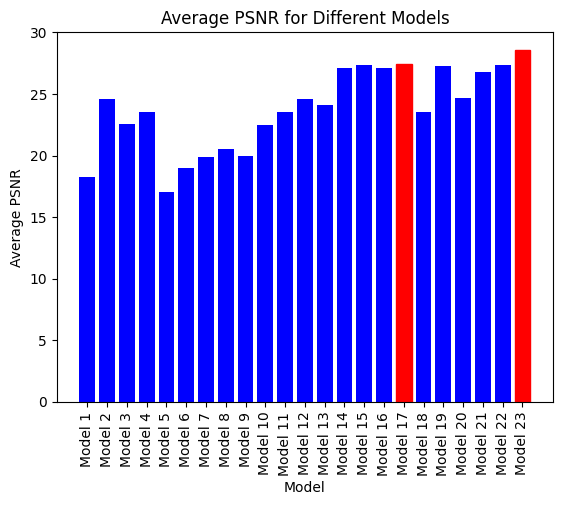

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
avg_psnr = [
    18.23, 24.59, 22.58, 23.56, 17., 19., 19.87, 20.52, 20, 22.5,
    23.5, 24.56, 24.12, 27.11, 27.32, 27.12, 27.42, 23.57, 27.27, 
    24.69, 26.8, 27.32, 28.58
]

model_names = [f"Model {i+1}" for i in range(len(avg_psnr))]

# Generate x-axis locations
x = np.arange(len(model_names))

# Create figure and axis objects
fig, ax = plt.subplots()

# Plot the bars
bars = ax.bar(x, avg_psnr, color='blue')

# Find the indices of the top two values
top_indices = np.argsort(avg_psnr)[-2:]

# Highlight the top two bars
for i in top_indices:
    bars[i].set_color('red')

# Set x-tick labels
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=90)

# Set axis labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Average PSNR')
ax.set_title('Average PSNR for Different Models')

# Display the plot
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio, structural_similarity

(x_train, _), (x_test, _) = cifar100.load_data()
jpeg_psnr_scores = []
jpeg_ssim_scores = []

for i in range(len(x_test)):
    image = x_train[i]
    image_tensor = tf.convert_to_tensor(image, dtype=tf.float32)
    normalized_image = image_tensor / 255.0
    compressed_image = tf.image.encode_jpeg(tf.cast(normalized_image * 255, tf.uint8))
    decoded_image = tf.image.decode_jpeg(compressed_image, channels=3)
    psnr = peak_signal_noise_ratio(image, decoded_image.numpy().astype(np.uint8))
    jpeg_psnr_scores.append(psnr)
    ssim = structural_similarity(image, decoded_image.numpy().astype(np.uint8), multichannel=True)
    jpeg_ssim_scores.append(ssim)

avg_psnr = np.mean(jpeg_psnr_scores)
avg_ssim = np.mean(jpeg_ssim_scores)

print("Average PSNR: {:.2f}".format(avg_psnr))
print("Average SSIM: {:.2f}".format(avg_ssim))

169001437/169001437 [==============================] - 3s 0us/step


<ipython-input-1-012369181fa3>:19: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim = structural_similarity(image, decoded_image.numpy().astype(np.uint8), multichannel=True)


Average PSNR: 34.36
Average SSIM: 0.97


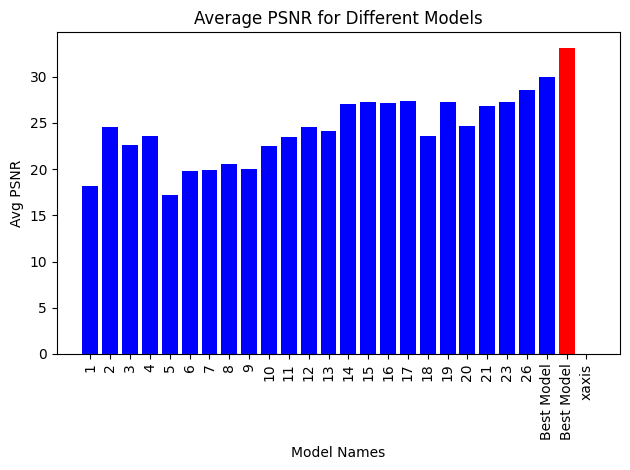

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

model_names = [
    "1", "2", "3", "4", "5", "6", "7", "8", "9", "10",
    "11", "12", "13", "14", "15", "16", "17", "18", "19", "20",
    "21", "23", "26", "Best Model", "JPEG", "xaxis"
]

avg_psnr = [
    18.23, 24.59, 22.58, 23.56, 17.23, 19.82, 19.87, 20.52, 20, 22.5,
    23.5, 24.56, 24.12, 27.11, 27.32, 27.12, 27.42, 23.57, 27.27, 
    24.69, 26.8, 27.32, 28.58, 29.96612, 33.16, 0
]

x = np.arange(len(model_names))

# Find the index of the maximum PSNR value
best_model_index = np.argmax(avg_psnr)

# Create a list to store the modified model names
modified_model_names = model_names.copy()

# Change the name of the bar with the highest PSNR value to "Best Model"
modified_model_names[best_model_index] = "Best Model"

# Create a color map for the bars
colors = ['blue'] * len(avg_psnr)
colors[best_model_index] = 'red'

plt.bar(x, avg_psnr, color=colors)
plt.xlabel("Model Names")
plt.ylabel("Avg PSNR")
plt.title("Average PSNR for Different Models")
plt.xticks(x, modified_model_names, rotation=90)
plt.tight_layout()

plt.show()
